# Basic EDA

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_profiling
import plotly 
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('../Data/housing_price.csv')
df_raw.head()

,inverse age of flat (year-1),inverse distance to the nearest MRT station (km-1),price per square metre ($ in thousands)
0,0.160,7.404,8.913
1,0.114,1.789,6.308
2,0.049,1.379,5.963
3,0.046,1.373,5.511
4,0.183,15.948,9.774


In [3]:
# rename features in df_raw
df_raw.rename(columns={'inverse age of flat (year-1)': 'Age_inversed', 'inverse distance to the nearest MRT station (km-1)': 'Distance_inverted','price per square metre ($ in thousands)':'Price ($)'}, inplace=True)

In [4]:
df_raw.columns

Index(['Age_inversed', 'Distance_inverted', 'Price ($)'], dtype='object')

In [5]:
profile = df_raw.profile_report(title="<give any name you want>")
profile.to_file(output_file="../Images/Math_pandas_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# plotly 3D plot of all features in df_raw
fig = px.scatter_3d(df_raw, x='Age_inversed', y='Distance_inverted', z='Price ($)')
fig.show()


# Qn 1 

In [4]:
# utility function to store inital parameters and optimal value of b
Total_history = pd.DataFrame(columns=['Starting Value', 'rate', 'epsilion', 'max_iter','Error','Local_min','No.iterations'])

def addHistory(Starting_Value,rate,epsilion,max_iter,Error,Local_min,No_iterations,past_history):

    '''
    Function to add specific model evaluation metrics with order to a history dataframe for easier comparism 
    '''

    cur_result = pd.Series({
        "Starting Value" : Starting_Value,
        "rate" : rate,
        'epsilion' : epsilion,
        "max_iter" : max_iter,
        "Error" : Error,
        'Local_min' : Local_min,
        'No.iterations' : No_iterations -1
    })
    history = past_history.append(cur_result, ignore_index=True)
    return history

In [50]:
x = df_raw['Distance_inverted']
y = df_raw['Price ($)']

b = 1 # staring value of b
rate = 0.0001 # Set Learning rate
epsilion = 0.00001 # Stopping criteria constant
diff = 1 # difference between two consecutive iterations
max_iter = 500 # Maximum number of iterations
iter = 1 # Iteration counter

Err = lambda b, x, y: np.mean((y - (b * x)) ** 2) # Error function
deriv = lambda b, x, y: -2 * np.mean((y - (b * x)) * x) # Derivative of Error function

while (diff > epsilion and iter < max_iter):
    b_new = b - rate * deriv(b,x, y) # New value of b
    print("Iteration: ", iter, "Error: ", Err(b_new, x, y), "b: ", b_new)
    diff = abs(b_new - b) # Difference between new and old value of b
    b = b_new # Update value of b
    iter += 1 # Increment iteration counter
print("The local minimum occurs at ", b)

# plot Simple linear regression line with predicted b
y_pred = b * x
fig = px.scatter(x=x, y=y)
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='Predicted'))
# add title
fig.update_layout(title_text="Model 1: y = bxi")
# update x axis title
fig.update_xaxes(title_text="Distance_inverted (x)")
# update y axis title
fig.update_yaxes(title_text="Price (y)")
fig.show()


Iteration:  1 Error:  21.27733754094431 b:  0.9980208472266666
Iteration:  2 Error:  21.239195475815116 b:  0.996062656077152
Iteration:  3 Error:  21.201857073436262 b:  0.994125204542484
Iteration:  4 Error:  21.16530540043472 b:  0.992208272965034
Iteration:  5 Error:  21.129523880227843 b:  0.9903116440136137
Iteration:  6 Error:  21.09449628550568 b:  0.9884351026588354
Iteration:  7 Error:  21.060206730871702 b:  0.9865784361487326
Iteration:  8 Error:  21.02663966563864 b:  0.98474143398464
Iteration:  9 Error:  20.993779866776038 b:  0.9829238878973277
Iteration:  10 Error:  20.96161243200646 b:  0.9811255918233891
Iteration:  11 Error:  20.930122773047138 b:  0.9793463418818787
Iteration:  12 Error:  20.899296608994046 b:  0.9775859363511972
Iteration:  13 Error:  20.869119959845328 b:  0.9758441756462207
Iteration:  14 Error:  20.839579140161224 b:  0.9741208622956739
Iteration:  15 Error:  20.810660752857586 b:  0.9724158009197409
Iteration:  16 Error:  20.78235168313015 b: 

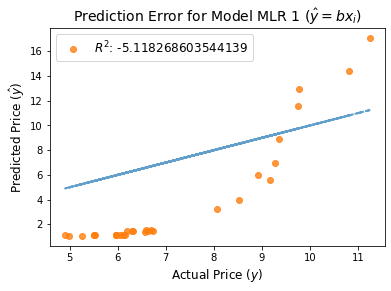

In [51]:
from sklearn.metrics import r2_score
y_hat = x*b
plt.plot(y, y, linewidth=2, linestyle='--', alpha=.7,)
plt.plot(y, y_hat, 'o', alpha=.8, label='$R^2$: {}'.format(r2_score(y, y_hat)))
plt.xlabel('Actual Price ($y$)', fontsize=12)
plt.ylabel('Predicted Price ($\hat{y}$)', fontsize=12)
plt.legend(facecolor='white', fontsize=12)
plt.title('Prediction Error for Model MLR 1 $(\hat{y}=bx_i)$', fontsize=14)
plt.show()

In [50]:
Total_history = addHistory(1,rate,epsilion,max_iter,Err(b,x,y),b,iter,Total_history)

C:\Users\Kaleb Nim\AppData\Local\Temp\ipykernel_46260\400757440.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = past_history.append(cur_result, ignore_index=True)


In [51]:
Total_history

,Starting Value,rate,epsilion,max_iter,Error,Local_min,No.iterations
0,0.0,0.0050,0.01000,500.0,19.471218,0.804318,6.0
1,0.0,0.0001,0.01000,500.0,53.743078,0.008612,1.0
2,0.0,0.0010,0.01000,500.0,19.784943,0.735660,21.0
3,0.0,0.0010,0.00010,500.0,19.467137,0.812346,62.0
4,1.0,0.0010,0.00010,500.0,19.467136,0.813907,49.0
5,1.0,0.0010,0.00010,500.0,19.467135,0.813890,84.0
6,1.0,0.0001,0.00010,500.0,19.471664,0.822411,282.0
7,1.0,0.0001,0.00001,500.0,19.467150,0.814063,498.0


In [131]:
Total_history_model2 = pd.DataFrame(columns=['initial_a','inital_b', 'L_rate', 'epsilion', 'max_iter','Error','a','b','No.iterations'])

def addHistory2(initial_a,inital_b,L_rate,epsilion,max_iter,Error,a,b,No_iterations,past_history):

    '''
    Function to add specific model evaluation metrics with order to a history dataframe for easier comparism 
    '''

    cur_result = pd.Series({
        'initial_a': initial_a,
        'inital_b': inital_b,
        "L_rate" : rate,
        'epsilion' : epsilion,
        "max_iter" : max_iter,
        'No.iterations' : No_iterations,
        "Error" : Error,
        'a' : a,
        'b' : b
    })
    history = past_history.append(cur_result, ignore_index=True)
    return history

In [47]:
x = df_raw['Distance_inverted']
y = df_raw['Price ($)']

initial_a = 5.0 # staring value of a
inital_b = 1 # staring value of b
rate = 0.01 # Set Learning rate
epsilion = 0.000001 # Stopping criteria constant
diff = 1 # difference between two consecutive iterations
max_iter = 50000 # Maximum number of iterations

# partial derivative of Error function with respect to a
deriv_a = lambda a, b, x, y: np.mean(-2*(y - (a + b * x)))
# partial derivative of Error function with respect to b
deriv_b = lambda a, b, x, y: np.mean(-2*(y - (a + b * x)) * x)

func = lambda a, b, x, y: np.mean((y - (a + b * x)) ** 2) # Error function

# initial value of func 
Error = func(initial_a, inital_b, x, y) 

for n in range (max_iter+1):
    next_a = initial_a - rate * deriv_a(initial_a, inital_b, x, y) # New value of a
    next_b = inital_b - rate * deriv_b(initial_a, inital_b, x, y) # New value of b
    Error_new = func(next_a, next_b, x, y) # New value of Error
    print("Iteration: ", n, "Error: ", Error_new, "a: ", next_a, "b: ", next_b)
    diff = abs(Error_new - Error) # Difference between new and old value of Error
    Error = Error_new # Update value of Error
    initial_a = next_a # Update value of a
    inital_b = next_b # Update value of b
    if (diff < epsilion):
        break
print("The local minimum occurs at ", initial_a, ",", inital_b)

Iteration:  0 Error:  0.9223944661020794 a:  4.94843 b:  0.3280013893333332
Iteration:  1 Error:  0.8171195824323283 a:  4.961608068268045 b:  0.3726203545664749
Iteration:  2 Error:  0.8086229943893323 a:  4.970291953617206 b:  0.36873293356925263
Iteration:  3 Error:  0.8007519766765402 a:  4.979170753560271 b:  0.36813938495416004
Iteration:  4 Error:  0.7930616758546614 a:  4.987928255805662 b:  0.36733261796244854
Iteration:  5 Error:  0.7855460143334292 a:  4.996587102963076 b:  0.3665499577103999
Iteration:  6 Error:  0.7782010173820179 a:  5.0051469824135735 b:  0.36577522638895693
Iteration:  7 Error:  0.7710228095331954 a:  5.013609121716523 b:  0.3650094100888147
Iteration:  8 Error:  0.7640076033645458 a:  5.021974630382271 b:  0.3642523341181592
Iteration:  9 Error:  0.7571516974580669 a:  5.030244612294656 b:  0.3635039036048828
Iteration:  10 Error:  0.7504514744470113 a:  5.038420158255293 b:  0.3627640194913392
Iteration:  11 Error:  0.7439033991072581 a:  5.0465023466

In [155]:
# plot
y_pred2 = initial_a + inital_b * x
y_pred1 = b * x
# add best fit line to plot
fig = px.scatter(x=x, y=y, labels={'x': 'Distance_inverted', 'y': 'Price ($)'}, title="Linear Regression of Model 1 & 2",trendline="ols")
fig.add_trace(go.Scatter(x=x, y=y_pred2, mode='lines', name='Predicted Model 2'))
fig.add_trace(go.Scatter(x=x, y=y_pred1, mode='lines', name='Predicted Model 1'))
fig.show()

In [151]:
Total_history_model2 = addHistory2(5,1,rate,epsilion,max_iter,Error,initial_a,inital_b,n,Total_history_model2)

C:\Users\Kaleb Nim\AppData\Local\Temp\ipykernel_46260\1454695593.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [152]:
Total_history_model2

,initial_a,inital_b,L_rate,epsilion,max_iter,Error,a,b,No.iterations
0,1.0,1.0,0.0001,0.000010,500.0,12.146266,1.240997,0.707684,500.0
1,1.0,1.0,0.0001,0.000010,50000.0,0.505861,5.470443,0.323666,24962.0
2,1.0,1.0,0.0100,0.000001,50000.0,0.462132,5.737581,0.299490,549.0
3,25.0,25.0,0.0100,0.000001,50000.0,0.462133,5.754815,0.297931,659.0
4,5.0,10.0,0.0100,0.000001,50000.0,0.462132,5.737633,0.299485,455.0
5,5.0,1.0,0.0100,0.000001,50000.0,0.462132,5.737595,0.299489,394.0


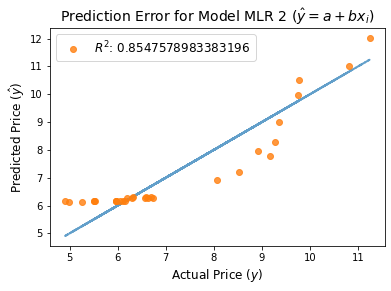

In [49]:
from sklearn.metrics import r2_score
y_hat = initial_a + x*inital_b
plt.plot(y, y, linewidth=2, linestyle='--', alpha=.7,)
plt.plot(y, y_hat, 'o', alpha=.8, label='$R^2$: {}'.format(r2_score(y, y_hat)))
plt.xlabel('Actual Price ($y$)', fontsize=12)
plt.ylabel('Predicted Price ($\hat{y}$)', fontsize=12)
plt.legend(facecolor='white', fontsize=12)
plt.title('Prediction Error for Model MLR 2 $(\hat{y}=a+bx_i)$', fontsize=14)
plt.show()

In [4]:
Total_history_model3 = pd.DataFrame(columns=['initial_a','inital_b','initial_c', 'L_rate', 'epsilion', 'max_iter','Error','a','b','c','No.iterations'])

def addHistory2(initial_a,inital_b,inital_c,L_rate,epsilion,max_iter,Error,a,b,c,No_iterations,past_history):

    '''
    Function to add specific model evaluation metrics with order to a history dataframe for easier comparism 
    '''

    cur_result = pd.Series({
        'initial_a': initial_a,
        'inital_b': inital_b,
        'initial_c': inital_c,
        "L_rate" : rate,
        'epsilion' : epsilion,
        "max_iter" : max_iter,
        'No.iterations' : No_iterations,
        "Error" : Error,
        'a' : a,
        'b' : b,
        'c' : c
    })
    history = past_history.append(cur_result, ignore_index=True)
    return history

In [52]:
x = df_raw['Distance_inverted']
y = df_raw['Price ($)']
w = df_raw['Age_inversed']


initial_a = 5 # Initial point from model 2
inital_b = 0 # staring value of b
initial_c = 10 # staring value of c
rate = 0.015 # Set Learning rate
epsilion = 0.000001 # Stopping criteria constant
diff = 1 # difference between two consecutive iterations
max_iter = 500000 # Maximum number of iterations


# partial derivative of Error function with respect to a
deriv_a = lambda a, b, c, x, y, w: np.mean(-2*(y - (a + b * x + c * w)))
# partial derivative of Error function with respect to b
deriv_b = lambda a, b, c, x, y, w: np.mean(-2*(y - (a + b * x + c * w)) * x)
# partial derivative of Error function with respect to c
deriv_c = lambda a, b, c, x, y, w: np.mean(-2*(y - (a + b * x + c * w)) * w)

# Error function
func = lambda a, b, c, x, y, w: np.mean((y - (a + b * x + c * w)) ** 2)

# initial value of func 
Error = func(initial_a, inital_b,initial_c, x, y,w) 

for n in range (max_iter+1):
    next_a = initial_a - rate * deriv_a(initial_a, inital_b,initial_c ,x, y,w) # New value of a
    next_b = inital_b - rate * deriv_b(initial_a, inital_b, initial_c,x, y,w) # New value of b
    next_c = initial_c - rate * deriv_c(initial_a, inital_b, initial_c,x, y,w) # New value of c
    Error_new = func(next_a,next_b,next_c,x,y,w) # New value of Error
    print("Iteration: ", n, "Error: ", Error_new, "a: ", next_a, "b: ", next_b, "c: ", next_c)
    diff = abs(Error_new - Error) # Difference between new and old value of Error
    Error = Error_new # Update value of Error
    initial_a = next_a # Update value of a
    inital_b = next_b # Update value of b
    initial_c = next_c # Update value of c
    if (diff < epsilion):
        break
print("The local minimum occurs at ", initial_a, ",", inital_b,',',initial_c)

Iteration:  0 Error:  1.1654290796835356 a:  5.03086 b:  0.35451310300000005 c:  10.005199248
Iteration:  1 Error:  0.5564372655861282 a:  5.0103558912833766 b:  0.14131111101626614 c:  10.002273088287946
Iteration:  2 Error:  0.33576693662771234 a:  5.020799511007319 b:  0.2698015764184363 c:  10.004240020897686
Iteration:  3 Error:  0.25577095156767915 a:  5.012648576159915 b:  0.19263177503194978 c:  10.00326444692516
Iteration:  4 Error:  0.22673717914735164 a:  5.015720962287206 b:  0.23924154765577757 c:  10.00406240024649
Iteration:  5 Error:  0.21616665214942493 a:  5.0120693880800085 b:  0.21134821517194802 c:  10.003795358655823
Iteration:  6 Error:  0.2122863105143751 a:  5.01249539851999 b:  0.2282938912975303 c:  10.004171724930583
Iteration:  7 Error:  0.21083121420475093 a:  5.01049724983811 b:  0.21824918211692773 c:  10.004163206579372
Iteration:  8 Error:  0.2102562989434657 a:  5.00998768335081 b:  0.22444669683472293 c:  10.004388669640077
Iteration:  9 Error:  0.21

In [59]:
Total_history_model3 = addHistory2(5,0,10,rate,epsilion,max_iter,Error,initial_a_model3,inital_b_model3,initial_c_model3,n,Total_history_model3)

C:\Users\Kaleb Nim\AppData\Local\Temp\ipykernel_14536\4201480586.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [60]:
Total_history_model3

,initial_a,inital_b,initial_c,L_rate,epsilion,max_iter,Error,a,b,c,No.iterations
0,5.737595,0.299489,1.0,0.010,0.000001,50000.0,0.189124,4.837627,0.217615,11.409884,50000.0
1,5.737595,0.299489,1.0,0.020,0.000001,50000.0,NaN,NaN,NaN,NaN,50000.0
2,5.737595,0.299489,1.0,0.010,0.000001,50000.0,0.189124,4.837627,0.217615,11.409884,50000.0
3,5.737595,0.299489,1.0,0.010,0.000010,50000.0,0.393401,5.586744,0.284118,2.027854,3169.0
4,5.737595,0.299489,1.0,0.010,0.000001,500000.0,0.179897,4.770209,0.211630,12.254230,57794.0
5,5.737595,0.299489,1.0,0.015,0.000001,500000.0,0.171989,4.700908,0.205477,13.122163,44942.0
6,10.000000,10.000000,10.0,0.015,0.000001,500000.0,0.171989,4.700907,0.205477,13.122179,20799.0
7,10.000000,0.000000,10.0,0.015,0.000001,500000.0,0.171990,4.700914,0.205478,13.122097,20498.0
8,5.000000,0.000000,10.0,0.015,0.000001,500000.0,0.171990,4.700914,0.205478,13.122089,18751.0
9,5.000000,0.000000,10.0,0.015,0.000001,500000.0,0.171990,4.700914,0.205478,13.122089,18751.0


# digontics

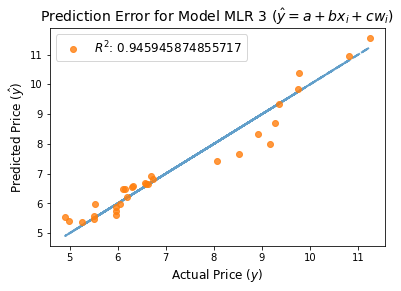

In [45]:
from sklearn.metrics import r2_score
y_hat = initial_a + x*inital_b + w*initial_c
plt.plot(y, y, linewidth=2, linestyle='--', alpha=.7,)
plt.plot(y, y_hat, 'o', alpha=.8, label='$R^2$: {}'.format(r2_score(y, y_hat)))
plt.xlabel('Actual Price ($y$)', fontsize=12)
plt.ylabel('Predicted Price ($\hat{y}$)', fontsize=12)
plt.legend(facecolor='white', fontsize=12)
plt.title('Prediction Error for Model MLR 3 $(\hat{y}=a+bx_i+cw_i)$', fontsize=14)
plt.show()

In [58]:
# plot
y_pred2 = initial_a + inital_b * x
y_pred1 = b * x
y_pred3 = initial_a_model3 + inital_b_model3 * x + initial_c_model3 * w
# add best fit line to plot
fig = px.scatter(x=x, y=y, labels={'x': 'Distance_inverted', 'y': 'Price ($)'}, title="Linear Regression of Model 1 & 2",trendline="ols")
fig.add_trace(go.Scatter(x=x, y=y_pred1, mode='lines', name='Predicted Model 1'))
fig.add_trace(go.Scatter(x=x, y=y_pred2, mode='lines', name='Predicted Model 2'))
fig.add_trace(go.Scatter(x=x, y=y_pred3, mode='lines', name='Predicted Model 3'))
fig.show()